<a href="https://colab.research.google.com/github/MuhammadMuneebFida/Resnet-18-and-vgg-16-on-COVID-19-dataset/blob/master/vgg_and_resnet_python_file.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# VGG Task 1

In [0]:
from google.colab import drive
drive.mount('./gdrive')
!unzip "./gdrive/My Drive/Assignment 5 Dataset.zip"

In [0]:
from google.colab import drive
drive.mount('./gdrive')
!unzip "./gdrive/My Drive/Assignment 5 Dataset.zip"
trainPath='/content/Assignment 5 Dataset/train'
validPath='/content/Assignment 5 Dataset/validation'
testPath='/content/Assignment 5 Dataset/test'

In [1]:
from google.colab import drive
drive.mount('./gdrive')
!unzip "./gdrive/My Drive/Assignment 5 Dataset.zip"
trainPath='/content/Assignment 5 Dataset/train'
validPath='/content/Assignment 5 Dataset/validation'
testPath='/content/Assignment 5 Dataset/test'
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.autograd import Variable
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy
from sklearn.metrics import accuracy_score

Streaming output truncated to the last 5000 lines.
  inflating: Assignment 5 Dataset/train/normal/7ec0b033-9133-4f8c-abd0-ea246aa21dfa.png  
  inflating: Assignment 5 Dataset/train/normal/7ec4666c-0304-4b7b-8263-bf417ab7cccd.png  
  inflating: Assignment 5 Dataset/train/normal/7ee9ace4-3059-49c4-9356-705203289e46.png  
  inflating: Assignment 5 Dataset/train/normal/7ef283b8-9c5a-4ada-a575-f68289e338ae.png  
  inflating: Assignment 5 Dataset/train/normal/7ef98cac-f239-406e-af10-67aead1e038f.png  
  inflating: Assignment 5 Dataset/train/normal/7efb172c-23b7-4d57-bd57-bd461b9e7ca7.png  
  inflating: Assignment 5 Dataset/train/normal/7f015127-0907-4ba7-8021-cf868a210d4c.png  
  inflating: Assignment 5 Dataset/train/normal/7f05b70f-2ad0-4db6-9e05-6c2baec8cd52.png  
  inflating: Assignment 5 Dataset/train/normal/7f11cf49-7b97-4d39-82a1-18411a4599cd.png  
  inflating: Assignment 5 Dataset/train/normal/7f12966e-c382-4f9e-90ac-e1575dcdc812.png  
  inflating: Assignment 5 Dataset/train/normal/7f

In [2]:
# from google.colab import drive
# drive.mount('./gdrive')
# !unzip "./gdrive/My Drive/Assignment 5 Dataset.zip"
# trainPath='/content/Assignment 5 Dataset/train'
# validPath='/content/Assignment 5 Dataset/validation'
# testPath='/content/Assignment 5 Dataset/test'
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from torch.optim import lr_scheduler
# from torch.autograd import Variable
# import numpy as np
# import torchvision
# from torchvision import datasets, models, transforms
# import matplotlib.pyplot as plt
# import time
# import os
# import copy
# from sklearn.metrics import accuracy_score
#Define transforms for the training data and testing data
train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                       transforms.Resize((224,224)),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor()])

valid_transforms = transforms.Compose([transforms.Resize((224,224)),

                                      transforms.ToTensor()])


test_transforms = transforms.Compose([transforms.Resize((224,224)),

                                      transforms.ToTensor()])
#pass transform here-in
train_data = torchvision.datasets.ImageFolder(trainPath , transform=train_transforms)
valid_data=torchvision.datasets.ImageFolder(validPath , transform=train_transforms)
test_data = datasets.ImageFolder(testPath, transform=test_transforms)

#data loaders
trainloader = torch.utils.data.DataLoader(train_data, batch_size=128, shuffle=True,num_workers=4)
validloader=torch.utils.data.DataLoader(valid_data, batch_size=128, shuffle=True,num_workers=4)
testloader = torch.utils.data.DataLoader(test_data, batch_size=128, shuffle=True,num_workers=4)

print("Classes: ")
class_names = train_data.classes
print(class_names)

Classes: 
['infected', 'normal']


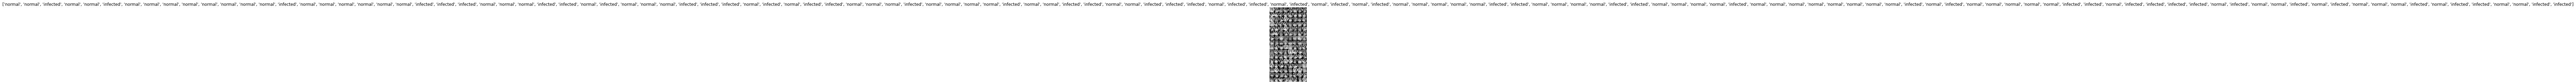

In [7]:
def imshow(inp, title=None):
    inp = inp.numpy().transpose((1, 2, 0))
    plt.axis('off')
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)

def show_databatch(inputs, classes):
    out = torchvision.utils.make_grid(inputs)
    imshow(out, title=[class_names[x] for x in classes])

# Get a batch of training data
inputs, classes = next(iter(trainloader))
show_databatch(inputs, classes)

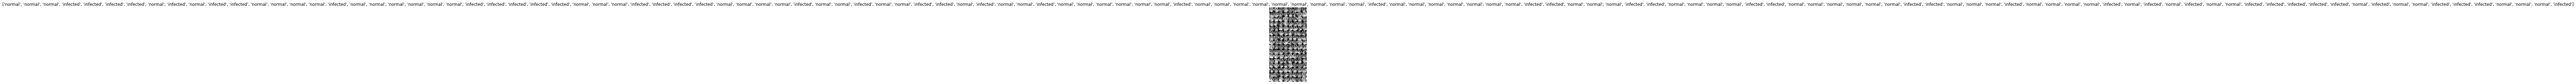

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/checkpoints/vgg16-397923af.pth



VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=

In [4]:
# def imshow(inp, title=None):
#     inp = inp.numpy().transpose((1, 2, 0))
#     plt.axis('off')
#     plt.imshow(inp)
#     if title is not None:
#         plt.title(title)
#     plt.pause(0.001)

# def show_databatch(inputs, classes):
#     out = torchvision.utils.make_grid(inputs)
#     imshow(out, title=[class_names[x] for x in classes])

# # Get a batch of training data
# inputs, classes = next(iter(trainloader))
# show_databatch(inputs, classes)# Load the pretrained model from pytorch

# vgg16 = models.vgg16(pretrained=True)
# print(vgg16)
# print('Output Layer of VGG16 : ', vgg16.classifier[6].out_features) # 1000 

In [8]:
# def imshow(inp, title=None):
#     inp = inp.numpy().transpose((1, 2, 0))
#     plt.axis('off')
#     plt.imshow(inp)
#     if title is not None:
#         plt.title(title)
#     plt.pause(0.001)

# def show_databatch(inputs, classes):
#     out = torchvision.utils.make_grid(inputs)
#     imshow(out, title=[class_names[x] for x in classes])

# # Get a batch of training data
# inputs, classes = next(iter(trainloader))
# show_databatch(inputs, classes)# Load the pretrained model from pytorch

vgg16 = models.vgg16(pretrained=True)
print(vgg16)
print('Output Layer of VGG16 : ', vgg16.classifier[6].out_features) # 1000 

# num_features = vgg16.classifier[6].in_features
# features = list(vgg16.classifier.children())[:] 

# vgg16.classifier[6].out_features = 1000

features=([nn.Linear(25088,1000),nn.ReLU(inplace=True),nn.Linear(1000, 2),nn.Sigmoid()])

print(features)

# Freeze training for all layers
for param in vgg16.features.parameters():
    param.requires_grad = False


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [6]:
# vgg16.classifier = nn.Sequential(*features)
# print(vgg16)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [0]:
# vgg16.classifier = nn.Sequential(*features)
# print(vgg16)
# Epochs = 10
# criterion = nn.CrossEntropyLoss()
# optimizer = optim.SGD(vgg16.parameters(), lr=0.1, momentum=0.6)

In [9]:
vgg16.classifier = nn.Sequential(*features)
print(vgg16)
Epochs = 10
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(vgg16.parameters(), lr=0.1, momentum=0.6)
def validLos(loader):
   total=0.0
   correct=0.0
   running_loss=0.0   

   pbar = tqdm(enumerate(loader))
   for i, data in pbar:
      # get the inputs
      inputs, labels = data
      inputs, labels = inputs.to(device), labels.to(device)

      # forward + backward + optimize
      outputs = vgg16(inputs)               #----> forward pass
      loss = criterion(outputs, labels)   #----> compute loss

      _,pred=torch.max(outputs.data,dim=1)        
      
      total += labels.size(0)
      correct += (pred == labels).sum().item()
          # print statistics
      accuracy=correct*100/total
      running_loss += loss.item()
      
      pbar.set_description(
          'Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
              epoch, i * len(inputs), len(loader.dataset),
              100. * i / len(loader),
              loss.item()))
   return running_loss,len(data),accuracy

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

Train Epoch: 0 [8928/12000 (99%)]	Loss: 0.418498: : 94it [02:00,  1.28s/it]
Train Epoch: 0 [1012/1500 (92%)]	Loss: 0.469726: : 12it [00:15,  1.30s/it]


84.66666666666667 Mean Validation Accracy
 79.95470033808024 Mean Train Accuracy 2.7536399513483047 Epoch Validation Loss 0.4544887301769662 Epoch train Loss


Train Epoch: 1 [8928/12000 (99%)]	Loss: 0.390676: : 94it [01:58,  1.27s/it]
Train Epoch: 1 [1012/1500 (92%)]	Loss: 0.457970: : 12it [00:15,  1.30s/it]


84.93333333333334 Mean Validation Accracy
 86.62501405705562 Mean Train Accuracy 2.7412651777267456 Epoch Validation Loss 0.4392666532955271 Epoch train Loss


Train Epoch: 2 [8928/12000 (99%)]	Loss: 0.389991: : 94it [01:57,  1.25s/it]
Train Epoch: 2 [1012/1500 (92%)]	Loss: 0.422597: : 12it [00:15,  1.31s/it]


85.53333333333333 Mean Validation Accracy
 87.46669823085708 Mean Train Accuracy 2.6870373487472534 Epoch Validation Loss 0.43164333225564755 Epoch train Loss


Train Epoch: 3 [8928/12000 (99%)]	Loss: 0.397709: : 94it [01:57,  1.25s/it]
Train Epoch: 3 [1012/1500 (92%)]	Loss: 0.407424: : 12it [00:15,  1.28s/it]


85.2 Mean Validation Accracy
 88.09977775900927 Mean Train Accuracy 2.6938962936401367 Epoch Validation Loss 0.42694097979271667 Epoch train Loss


Train Epoch: 4 [8928/12000 (99%)]	Loss: 0.368616: : 94it [01:57,  1.25s/it]
Train Epoch: 4 [1012/1500 (92%)]	Loss: 0.412042: : 12it [00:14,  1.24s/it]


86.33333333333333 Mean Validation Accracy
 88.52376654415431 Mean Train Accuracy 2.6658019721508026 Epoch Validation Loss 0.4234837869380383 Epoch train Loss


Train Epoch: 5 [8928/12000 (99%)]	Loss: 0.409634: : 94it [01:54,  1.22s/it]
Train Epoch: 5 [1012/1500 (92%)]	Loss: 0.385169: : 12it [00:15,  1.27s/it]


85.53333333333333 Mean Validation Accracy
 88.814317169828 Mean Train Accuracy 2.6872821301221848 Epoch Validation Loss 0.4213028275374825 Epoch train Loss


Train Epoch: 6 [8928/12000 (99%)]	Loss: 0.368206: : 94it [01:57,  1.25s/it]
Train Epoch: 6 [1012/1500 (92%)]	Loss: 0.405491: : 12it [00:15,  1.28s/it]


87.13333333333334 Mean Validation Accracy
 88.95301981194177 Mean Train Accuracy 2.6206320077180862 Epoch Validation Loss 0.41958682533455477 Epoch train Loss


Train Epoch: 7 [8928/12000 (99%)]	Loss: 0.366315: : 94it [01:58,  1.26s/it]
Train Epoch: 7 [1012/1500 (92%)]	Loss: 0.432312: : 12it [00:15,  1.31s/it]


87.2 Mean Validation Accracy
 89.14717708931353 Mean Train Accuracy 2.6385302990674973 Epoch Validation Loss 0.41790192518779573 Epoch train Loss


Train Epoch: 8 [8928/12000 (99%)]	Loss: 0.340954: : 94it [01:58,  1.26s/it]
Train Epoch: 8 [1012/1500 (92%)]	Loss: 0.421394: : 12it [00:15,  1.28s/it]


84.06666666666666 Mean Validation Accracy
 89.28643864931735 Mean Train Accuracy 2.7985325157642365 Epoch Validation Loss 0.41642063708170085 Epoch train Loss


Train Epoch: 9 [8928/12000 (99%)]	Loss: 0.420793: : 94it [01:58,  1.26s/it]
Train Epoch: 9 [1012/1500 (92%)]	Loss: 0.461613: : 12it [00:15,  1.28s/it]


87.46666666666667 Mean Validation Accracy
 89.42638195238834 Mean Train Accuracy 2.6074273139238358 Epoch Validation Loss 0.4152246006625764 Epoch train Loss


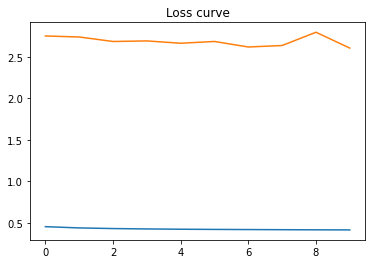

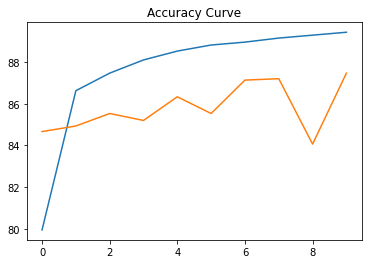

Finished Training


In [12]:
from tqdm import tqdm

#if you have gpu then you need to convert the network and data to cuda
#the easiest way is to first check for device and then convert network and data to device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
vgg16.to(device)
meanTrain=[]
meanValid=[]
meanVerror=[]
meanTerror=[]
losssssList=[]
total=0.0
correct=0.0
targets=[]
all_pred=[]
    
for epoch in range(Epochs):  # loop over the dataset multiple times
  vgg16.train()
  acc=[]
  temp=[]
  running_loss = 0.0
  l=0
  pbar = tqdm(enumerate(trainloader))
  for i, data in pbar:
      # get the inputs
      inputs, labels = data
      inputs, labels = inputs.to(device), labels.to(device)
      l=len(data)
      # zero the parameter gradients
      optimizer.zero_grad()
      # In PyTorch, we need to set the gradients to zero before starting to do backpropragation 
      # because PyTorch accumulates the gradients on subsequent backward passes. 
      # This is convenient while training RNNs. 
      # So, the default action is to accumulate the gradients on every loss.backward() call

      # forward + backward + optimize
      outputs = vgg16(inputs)               #----> forward pass
      loss = criterion(outputs, labels)   #----> compute loss
      loss.backward()                     #----> backward pass
      optimizer.step()                    #----> weights update
      
      _,pred=torch.max(outputs.data,dim=1)        
      
      total += labels.size(0)
      correct += (pred == labels).sum().item()
      accuracy=correct*100/total
      temp.append(accuracy)
      losssssList.append(loss.item())
      # running_loss += loss.item()
      # print(running_loss/len(trainloader))
      pbar.set_description(
          'Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
              epoch, i * len(inputs), len(trainloader.dataset),
              100. * i / len(trainloader),
              loss.item()))
  vgg16.eval()
  targets+=list(labels.view(-1).cpu().numpy())
  all_pred+=(list(pred.view(-1).cpu().numpy()))
  epoch_loss_train=np.mean(np.asarray(losssssList))#running_loss/len(data)
  meanTerror.append(epoch_loss_train)
  
  tAccu=np.asarray(temp)
  meanTrainAccuracy=np.mean(tAccu)
  meanTrain.append(meanTrainAccuracy)

  los,dataLen,validAccu=validLos(validloader)
  epoch_loss = los/ dataLen
  meanVerror.append(epoch_loss)
  acc.append(validAccu)
  acc=np.asarray(acc)

  meanAccu=np.mean(acc)
  meanValid.append(meanAccu)
  print(meanAccu,"Mean Validation Accracy\n",meanTrainAccuracy,"Mean Train Accuracy",epoch_loss,"Epoch Validation Loss",epoch_loss_train,'Epoch train Loss')
  torch.save(vgg16.state_dict(), 'vgg16_ft.pth')

plt.title("Loss curve")
plt.plot(range(Epochs), meanTerror)
plt.plot(range(Epochs), meanVerror)
plt.show()

plt.title("Accuracy Curve")
plt.plot(range(Epochs), meanTrain)
plt.plot(range(Epochs), meanValid)
plt.show()


print('Finished Training')

In [15]:
from sklearn.metrics import confusion_matrix
cm=confusionMatrix(targets,all_pred)
print(cm)

[[355  35]
 [ 35 535]]


In [0]:
  dataiter = iter(testloader)
images, labels = dataiter.next()
show_databatch(images, labels)
images, labels = images.to(device), labels.to(device) #-->convert test image to cuda (if available)
outputs = vgg16(images)                               #--> forward pass
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % class_names[predicted[j]]
                              for j in range(len(images))))
print('Ground Truth: ', ' '.join('%5s' % class_names[labels[j]]
                              for j in range(len(images))))
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = vgg16(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))


# VGG Task 2


In [0]:
from google.colab import drive
drive.mount('./gdrive')
!unzip "./gdrive/My Drive/Assignment 5 Dataset.zip"

Drive already mounted at ./gdrive; to attempt to forcibly remount, call drive.mount("./gdrive", force_remount=True).
Archive:  ./gdrive/My Drive/Assignment 5 Dataset.zip
replace Assignment 5 Dataset/desktop.ini? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [0]:
trainPath='/content/Assignment 5 Dataset/train'
validPath='/content/Assignment 5 Dataset/validation'
testPath='/content/Assignment 5 Dataset/test'

In [0]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.autograd import Variable
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix


In [0]:
#Define transforms for the training data and testing data
train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                       transforms.Resize((224,224)),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor()])

valid_transforms = transforms.Compose([transforms.Resize((224,224)),

                                      transforms.ToTensor()])


test_transforms = transforms.Compose([transforms.Resize((224,224)),

                                      transforms.ToTensor()])
#pass transform here-in
train_data = torchvision.datasets.ImageFolder(trainPath , transform=train_transforms)
valid_data=torchvision.datasets.ImageFolder(validPath , transform=train_transforms)
test_data = datasets.ImageFolder(testPath, transform=test_transforms)

#data loaders
trainloader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True,num_workers=4)
validloader=torch.utils.data.DataLoader(valid_data, batch_size=64, shuffle=True,num_workers=4)
testloader = torch.utils.data.DataLoader(test_data, batch_size=64, shuffle=True,num_workers=4)

print("Classes: ")
class_names = train_data.classes
print(class_names)

Classes: 
['infected', 'normal']


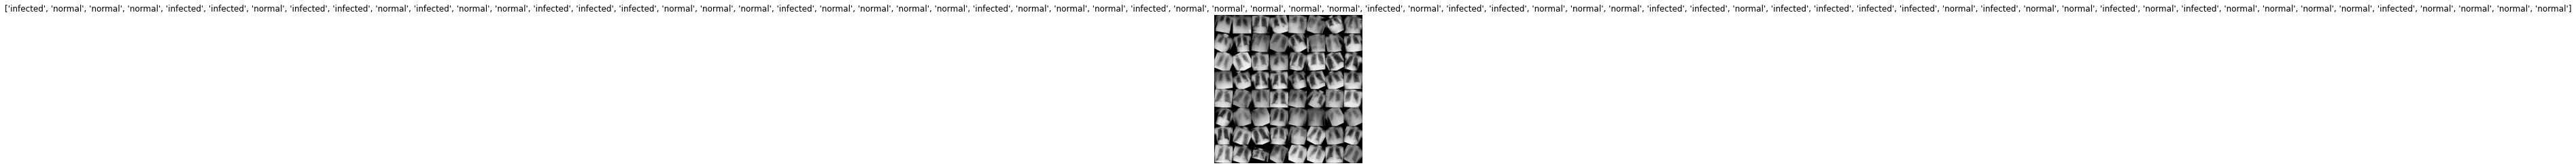

In [0]:
def imshow(inp, title=None):
    inp = inp.numpy().transpose((1, 2, 0))
    plt.axis('off')
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)

def show_databatch(inputs, classes):
    out = torchvision.utils.make_grid(inputs)
    imshow(out, title=[class_names[x] for x in classes])

# Get a batch of training data
inputs, classes = next(iter(trainloader))
show_databatch(inputs, classes)

In [0]:
# Load the pretrained model from pytorch

vgg16 = models.vgg16(pretrained=True)
print(vgg16)
print('Output Layer of VGG16 : ', vgg16.classifier[6].out_features) # 1000 

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [0]:
# num_features = vgg16.classifier[6].in_features
# features = list(vgg16.classifier.children())[:] 

# vgg16.classifier[6].out_features = 1000

features=([nn.Linear(25088,1000),nn.ReLU(inplace=True),nn.Linear(1000, 2),nn.Sigmoid()])

print(features)

# Freeze training for all layers
for param in vgg16.features.parameters():
    param.requires_grad = True

[Linear(in_features=25088, out_features=1000, bias=True), ReLU(inplace=True), Linear(in_features=1000, out_features=2, bias=True), Sigmoid()]


In [0]:
vgg16.classifier = nn.Sequential(*features)
print(vgg16)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [0]:
Epochs = 10
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(vgg16.parameters(), lr=0.001, momentum=0.9)
# optimizerResnet = optim.SGD(ResNet-18.parameters(), lr=0.1, momentum=0.9)

In [0]:
def confusionMatrix(targets,all_pred):
  cm=confusion_matrix(y_true=targets,y_pred=all_pred)
  # print(cm)
  return cm

In [0]:
def validLos(loader):
   total=0.0
   correct=0.0
   running_loss=0.0   

   pbar = tqdm(enumerate(loader))
   for i, data in pbar:
      # get the inputs
      inputs, labels = data
      inputs, labels = inputs.to(device), labels.to(device)

      # forward + backward + optimize
      outputs = vgg16(inputs)               #----> forward pass
      loss = criterion(outputs, labels)   #----> compute loss

      _,pred=torch.max(outputs.data,dim=1)        
      
      total += labels.size(0)
      correct += (pred == labels).sum().item()
          # print statistics
      accuracy=correct*100/total
      running_loss += loss.item()
      
      pbar.set_description(
          'Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
              epoch, i * len(inputs), len(loader.dataset),
              100. * i / len(loader),
              loss.item()))
   return running_loss,len(data),accuracy




0it [00:00, ?it/s]


Train Epoch: 0 [0/12000 (0%)]	Loss: 0.334725: : 0it [00:04, ?it/s]


Train Epoch: 0 [0/12000 (0%)]	Loss: 0.334725: : 1it [00:04,  4.75s/it]


Train Epoch: 0 [64/12000 (1%)]	Loss: 0.315430: : 1it [00:06,  4.75s/it]


Train Epoch: 0 [64/12000 (1%)]	Loss: 0.315430: : 2it [00:06,  3.91s/it]


Train Epoch: 0 [128/12000 (1%)]	Loss: 0.414616: : 2it [00:08,  3.91s/it]


Train Epoch: 0 [128/12000 (1%)]	Loss: 0.414616: : 3it [00:08,  3.33s/it]


Train Epoch: 0 [192/12000 (2%)]	Loss: 0.354789: : 3it [00:10,  3.33s/it]


Train Epoch: 0 [192/12000 (2%)]	Loss: 0.354789: : 4it [00:10,  2.91s/it]


Train Epoch: 0 [256/12000 (2%)]	Loss: 0.365729: : 4it [00:12,  2.91s/it]


Train Epoch: 0 [256/12000 (2%)]	Loss: 0.365729: : 5it [00:12,  2.63s/it]


Train Epoch: 0 [320/12000 (3%)]	Loss: 0.397385: : 5it [00:14,  2.63s/it]


Train Epoch: 0 [320/12000 (3%)]	Loss: 0.397385: : 6it [00:14,  2.43s/it]


Train Epoch: 0 [384/12000 (3%)]	Loss: 0.383245: : 6it [00:16,  2.43s/it]


Train Epoch

90.93333333333334 Mean Validation Accracy
 93.92255773937136 Mean Train Accuracy 4.774054527282715 Epoch Validation Loss 0.37396308145624524 Epoch train Loss





0it [00:00, ?it/s]


Train Epoch: 1 [0/12000 (0%)]	Loss: 0.386847: : 0it [00:04, ?it/s]


Train Epoch: 1 [0/12000 (0%)]	Loss: 0.386847: : 1it [00:04,  4.45s/it]


Train Epoch: 1 [64/12000 (1%)]	Loss: 0.370540: : 1it [00:06,  4.45s/it]


Train Epoch: 1 [64/12000 (1%)]	Loss: 0.370540: : 2it [00:06,  3.70s/it]


Train Epoch: 1 [128/12000 (1%)]	Loss: 0.344258: : 2it [00:08,  3.70s/it]


Train Epoch: 1 [128/12000 (1%)]	Loss: 0.344258: : 3it [00:08,  3.18s/it]


Train Epoch: 1 [192/12000 (2%)]	Loss: 0.358986: : 3it [00:10,  3.18s/it]


Train Epoch: 1 [192/12000 (2%)]	Loss: 0.358986: : 4it [00:10,  2.81s/it]


Train Epoch: 1 [256/12000 (2%)]	Loss: 0.381816: : 4it [00:12,  2.81s/it]


Train Epoch: 1 [256/12000 (2%)]	Loss: 0.381816: : 5it [00:12,  2.56s/it]


Train Epoch: 1 [320/12000 (3%)]	Loss: 0.405245: : 5it [00:14,  2.56s/it]


Train Epoch: 1 [320/12000 (3%)]	Loss: 0.405245: : 6it [00:14,  2.37s/it]


Train Epoch: 1 [384/12000 (3%)]	Loss: 0.351216: : 6it [00:16,  2.37s/it]


Train Epoch

90.4 Mean Validation Accracy
 93.86557634395788 Mean Train Accuracy 4.869680657982826 Epoch Validation Loss 0.3721803853169401 Epoch train Loss





0it [00:00, ?it/s]


Train Epoch: 2 [0/12000 (0%)]	Loss: 0.398325: : 0it [00:04, ?it/s]


Train Epoch: 2 [0/12000 (0%)]	Loss: 0.398325: : 1it [00:04,  4.27s/it]


Train Epoch: 2 [64/12000 (1%)]	Loss: 0.349908: : 1it [00:06,  4.27s/it]


Train Epoch: 2 [64/12000 (1%)]	Loss: 0.349908: : 2it [00:06,  3.58s/it]


Train Epoch: 2 [128/12000 (1%)]	Loss: 0.376624: : 2it [00:08,  3.58s/it]


Train Epoch: 2 [128/12000 (1%)]	Loss: 0.376624: : 3it [00:08,  3.09s/it]


Train Epoch: 2 [192/12000 (2%)]	Loss: 0.347677: : 3it [00:10,  3.09s/it]


Train Epoch: 2 [192/12000 (2%)]	Loss: 0.347677: : 4it [00:10,  2.74s/it]


Train Epoch: 2 [256/12000 (2%)]	Loss: 0.378756: : 4it [00:12,  2.74s/it]


Train Epoch: 2 [256/12000 (2%)]	Loss: 0.378756: : 5it [00:12,  2.51s/it]


Train Epoch: 2 [320/12000 (3%)]	Loss: 0.435657: : 5it [00:14,  2.51s/it]


Train Epoch: 2 [320/12000 (3%)]	Loss: 0.435657: : 6it [00:14,  2.34s/it]


Train Epoch: 2 [384/12000 (3%)]	Loss: 0.379017: : 6it [00:15,  2.34s/it]


Train Epoch

89.46666666666667 Mean Validation Accracy
 93.89916748895361 Mean Train Accuracy 4.952295958995819 Epoch Validation Loss 0.37275849325014343 Epoch train Loss





0it [00:00, ?it/s]


Train Epoch: 3 [0/12000 (0%)]	Loss: 0.331043: : 0it [00:04, ?it/s]


Train Epoch: 3 [0/12000 (0%)]	Loss: 0.331043: : 1it [00:04,  4.33s/it]


Train Epoch: 3 [64/12000 (1%)]	Loss: 0.429226: : 1it [00:06,  4.33s/it]


Train Epoch: 3 [64/12000 (1%)]	Loss: 0.429226: : 2it [00:06,  3.62s/it]


Train Epoch: 3 [128/12000 (1%)]	Loss: 0.403312: : 2it [00:08,  3.62s/it]


Train Epoch: 3 [128/12000 (1%)]	Loss: 0.403312: : 3it [00:08,  3.12s/it]


Train Epoch: 3 [192/12000 (2%)]	Loss: 0.382499: : 3it [00:10,  3.12s/it]


Train Epoch: 3 [192/12000 (2%)]	Loss: 0.382499: : 4it [00:10,  2.76s/it]


Train Epoch: 3 [256/12000 (2%)]	Loss: 0.385393: : 4it [00:12,  2.76s/it]


Train Epoch: 3 [256/12000 (2%)]	Loss: 0.385393: : 5it [00:12,  2.53s/it]


Train Epoch: 3 [320/12000 (3%)]	Loss: 0.393867: : 5it [00:14,  2.53s/it]


Train Epoch: 3 [320/12000 (3%)]	Loss: 0.393867: : 6it [00:14,  2.35s/it]


Train Epoch: 3 [384/12000 (3%)]	Loss: 0.395289: : 6it [00:16,  2.35s/it]


Train Epoch

91.0 Mean Validation Accracy
 93.87725458588497 Mean Train Accuracy 4.778207570314407 Epoch Validation Loss 0.3723285588970844 Epoch train Loss





0it [00:00, ?it/s]


Train Epoch: 4 [0/12000 (0%)]	Loss: 0.367360: : 0it [00:04, ?it/s]


Train Epoch: 4 [0/12000 (0%)]	Loss: 0.367360: : 1it [00:04,  4.30s/it]


Train Epoch: 4 [64/12000 (1%)]	Loss: 0.363385: : 1it [00:06,  4.30s/it]


Train Epoch: 4 [64/12000 (1%)]	Loss: 0.363385: : 2it [00:06,  3.60s/it]


Train Epoch: 4 [128/12000 (1%)]	Loss: 0.332571: : 2it [00:08,  3.60s/it]


Train Epoch: 4 [128/12000 (1%)]	Loss: 0.332571: : 3it [00:08,  3.11s/it]


Train Epoch: 4 [192/12000 (2%)]	Loss: 0.379827: : 3it [00:10,  3.11s/it]


Train Epoch: 4 [192/12000 (2%)]	Loss: 0.379827: : 4it [00:10,  2.76s/it]


Train Epoch: 4 [256/12000 (2%)]	Loss: 0.388260: : 4it [00:12,  2.76s/it]


Train Epoch: 4 [256/12000 (2%)]	Loss: 0.388260: : 5it [00:12,  2.52s/it]


Train Epoch: 4 [320/12000 (3%)]	Loss: 0.433051: : 5it [00:14,  2.52s/it]


Train Epoch: 4 [320/12000 (3%)]	Loss: 0.433051: : 6it [00:14,  2.35s/it]


Train Epoch: 4 [384/12000 (3%)]	Loss: 0.386858: : 6it [00:16,  2.35s/it]


Train Epoch

90.86666666666666 Mean Validation Accracy
 93.92690657676835 Mean Train Accuracy 4.798629015684128 Epoch Validation Loss 0.3721555550681784 Epoch train Loss





0it [00:00, ?it/s]


Train Epoch: 5 [0/12000 (0%)]	Loss: 0.415575: : 0it [00:04, ?it/s]


Train Epoch: 5 [0/12000 (0%)]	Loss: 0.415575: : 1it [00:04,  4.41s/it]


Train Epoch: 5 [64/12000 (1%)]	Loss: 0.355107: : 1it [00:06,  4.41s/it]


Train Epoch: 5 [64/12000 (1%)]	Loss: 0.355107: : 2it [00:06,  3.67s/it]


Train Epoch: 5 [128/12000 (1%)]	Loss: 0.324327: : 2it [00:08,  3.67s/it]


Train Epoch: 5 [128/12000 (1%)]	Loss: 0.324327: : 3it [00:08,  3.16s/it]


Train Epoch: 5 [192/12000 (2%)]	Loss: 0.353598: : 3it [00:10,  3.16s/it]


Train Epoch: 5 [192/12000 (2%)]	Loss: 0.353598: : 4it [00:10,  2.79s/it]


Train Epoch: 5 [256/12000 (2%)]	Loss: 0.430803: : 4it [00:12,  2.79s/it]


Train Epoch: 5 [256/12000 (2%)]	Loss: 0.430803: : 5it [00:12,  2.55s/it]


Train Epoch: 5 [320/12000 (3%)]	Loss: 0.347843: : 5it [00:14,  2.55s/it]


Train Epoch: 5 [320/12000 (3%)]	Loss: 0.347843: : 6it [00:14,  2.37s/it]


Train Epoch: 5 [384/12000 (3%)]	Loss: 0.349141: : 6it [00:16,  2.37s/it]


Train Epoch

91.6 Mean Validation Accracy
 93.96813057075629 Mean Train Accuracy 4.751418113708496 Epoch Validation Loss 0.3718830089725501 Epoch train Loss





0it [00:00, ?it/s]


Train Epoch: 6 [0/12000 (0%)]	Loss: 0.378987: : 0it [00:04, ?it/s]


Train Epoch: 6 [0/12000 (0%)]	Loss: 0.378987: : 1it [00:04,  4.33s/it]


Train Epoch: 6 [64/12000 (1%)]	Loss: 0.366443: : 1it [00:06,  4.33s/it]


Train Epoch: 6 [64/12000 (1%)]	Loss: 0.366443: : 2it [00:06,  3.62s/it]


Train Epoch: 6 [128/12000 (1%)]	Loss: 0.331850: : 2it [00:08,  3.62s/it]


Train Epoch: 6 [128/12000 (1%)]	Loss: 0.331850: : 3it [00:08,  3.12s/it]


Train Epoch: 6 [192/12000 (2%)]	Loss: 0.397609: : 3it [00:10,  3.12s/it]


Train Epoch: 6 [192/12000 (2%)]	Loss: 0.397609: : 4it [00:10,  2.77s/it]


Train Epoch: 6 [256/12000 (2%)]	Loss: 0.398221: : 4it [00:12,  2.77s/it]


Train Epoch: 6 [256/12000 (2%)]	Loss: 0.398221: : 5it [00:12,  2.52s/it]


Train Epoch: 6 [320/12000 (3%)]	Loss: 0.362593: : 5it [00:14,  2.52s/it]


Train Epoch: 6 [320/12000 (3%)]	Loss: 0.362593: : 6it [00:14,  2.35s/it]


Train Epoch: 6 [384/12000 (3%)]	Loss: 0.363878: : 6it [00:16,  2.35s/it]


Train Epoch

91.46666666666667 Mean Validation Accracy
 94.00202852829737 Mean Train Accuracy 4.741716638207436 Epoch Validation Loss 0.37157999499952904 Epoch train Loss





0it [00:00, ?it/s]


Train Epoch: 7 [0/12000 (0%)]	Loss: 0.372799: : 0it [00:04, ?it/s]


Train Epoch: 7 [0/12000 (0%)]	Loss: 0.372799: : 1it [00:04,  4.38s/it]


Train Epoch: 7 [64/12000 (1%)]	Loss: 0.390511: : 1it [00:06,  4.38s/it]


Train Epoch: 7 [64/12000 (1%)]	Loss: 0.390511: : 2it [00:06,  3.67s/it]


Train Epoch: 7 [128/12000 (1%)]	Loss: 0.317177: : 2it [00:08,  3.67s/it]


Train Epoch: 7 [128/12000 (1%)]	Loss: 0.317177: : 3it [00:08,  3.17s/it]


Train Epoch: 7 [192/12000 (2%)]	Loss: 0.358494: : 3it [00:10,  3.17s/it]


Train Epoch: 7 [192/12000 (2%)]	Loss: 0.358494: : 4it [00:10,  2.81s/it]


Train Epoch: 7 [256/12000 (2%)]	Loss: 0.370951: : 4it [00:12,  2.81s/it]


Train Epoch: 7 [256/12000 (2%)]	Loss: 0.370951: : 5it [00:12,  2.57s/it]


Train Epoch: 7 [320/12000 (3%)]	Loss: 0.351806: : 5it [00:14,  2.57s/it]


Train Epoch: 7 [320/12000 (3%)]	Loss: 0.351806: : 6it [00:14,  2.40s/it]


Train Epoch: 7 [384/12000 (3%)]	Loss: 0.353155: : 6it [00:16,  2.40s/it]


Train Epoch

90.86666666666666 Mean Validation Accracy
 94.03289737100161 Mean Train Accuracy 4.732899978756905 Epoch Validation Loss 0.37139954814251436 Epoch train Loss





0it [00:00, ?it/s]


Train Epoch: 8 [0/12000 (0%)]	Loss: 0.341486: : 0it [00:04, ?it/s]


Train Epoch: 8 [0/12000 (0%)]	Loss: 0.341486: : 1it [00:04,  4.35s/it]


Train Epoch: 8 [64/12000 (1%)]	Loss: 0.375428: : 1it [00:06,  4.35s/it]


Train Epoch: 8 [64/12000 (1%)]	Loss: 0.375428: : 2it [00:06,  3.64s/it]


Train Epoch: 8 [128/12000 (1%)]	Loss: 0.353889: : 2it [00:08,  3.64s/it]


Train Epoch: 8 [128/12000 (1%)]	Loss: 0.353889: : 3it [00:08,  3.15s/it]


Train Epoch: 8 [192/12000 (2%)]	Loss: 0.406374: : 3it [00:10,  3.15s/it]


Train Epoch: 8 [192/12000 (2%)]	Loss: 0.406374: : 4it [00:10,  2.79s/it]


Train Epoch: 8 [256/12000 (2%)]	Loss: 0.332821: : 4it [00:12,  2.79s/it]


Train Epoch: 8 [256/12000 (2%)]	Loss: 0.332821: : 5it [00:12,  2.55s/it]


Train Epoch: 8 [320/12000 (3%)]	Loss: 0.339107: : 5it [00:14,  2.55s/it]


Train Epoch: 8 [320/12000 (3%)]	Loss: 0.339107: : 6it [00:14,  2.38s/it]


Train Epoch: 8 [384/12000 (3%)]	Loss: 0.330349: : 6it [00:16,  2.38s/it]


Train Epoch

89.66666666666667 Mean Validation Accracy
 94.07120827043508 Mean Train Accuracy 4.905003845691681 Epoch Validation Loss 0.37084590312507415 Epoch train Loss





0it [00:00, ?it/s]


Train Epoch: 9 [0/12000 (0%)]	Loss: 0.356959: : 0it [00:04, ?it/s]


Train Epoch: 9 [0/12000 (0%)]	Loss: 0.356959: : 1it [00:04,  4.35s/it]


Train Epoch: 9 [64/12000 (1%)]	Loss: 0.343501: : 1it [00:06,  4.35s/it]


Train Epoch: 9 [64/12000 (1%)]	Loss: 0.343501: : 2it [00:06,  3.63s/it]


Train Epoch: 9 [128/12000 (1%)]	Loss: 0.391314: : 2it [00:08,  3.63s/it]


Train Epoch: 9 [128/12000 (1%)]	Loss: 0.391314: : 3it [00:08,  3.14s/it]


Train Epoch: 9 [192/12000 (2%)]	Loss: 0.336355: : 3it [00:10,  3.14s/it]


Train Epoch: 9 [192/12000 (2%)]	Loss: 0.336355: : 4it [00:10,  2.78s/it]


Train Epoch: 9 [256/12000 (2%)]	Loss: 0.318054: : 4it [00:12,  2.78s/it]


Train Epoch: 9 [256/12000 (2%)]	Loss: 0.318054: : 5it [00:12,  2.54s/it]


Train Epoch: 9 [320/12000 (3%)]	Loss: 0.382511: : 5it [00:14,  2.54s/it]


Train Epoch: 9 [320/12000 (3%)]	Loss: 0.382511: : 6it [00:14,  2.36s/it]


Train Epoch: 9 [384/12000 (3%)]	Loss: 0.318040: : 6it [00:16,  2.36s/it]


Train Epoch

90.73333333333333 Mean Validation Accracy
 94.11993475337219 Mean Train Accuracy 4.866757616400719 Epoch Validation Loss 0.3706080013450156 Epoch train Loss


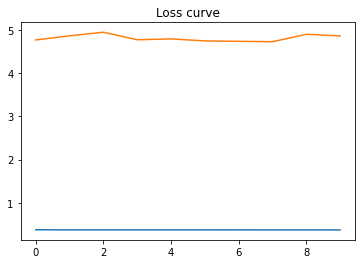

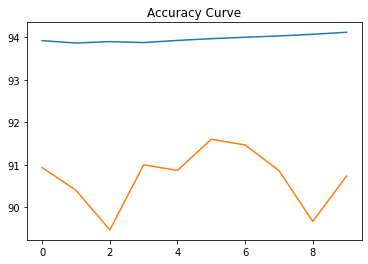

Finished Training


In [0]:
from tqdm import tqdm

#if you have gpu then you need to convert the network and data to cuda
#the easiest way is to first check for device and then convert network and data to device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
vgg16.to(device)
meanTrain=[]
meanValid=[]
meanVerror=[]
meanTerror=[]
losssssList=[]
total=0.0
correct=0.0
all_pred=[]
targets=[]
for epoch in range(Epochs):  # loop over the dataset multiple times
    vgg16.train()
    acc=[]
    temp=[]
    running_loss = 0.0
    l=0
    pbar = tqdm(enumerate(trainloader))
    for i, data in pbar:
        # get the inputs
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        l=len(data)
        # zero the parameter gradients
        optimizer.zero_grad()
        # In PyTorch, we need to set the gradients to zero before starting to do backpropragation 
        # because PyTorch accumulates the gradients on subsequent backward passes. 
        # This is convenient while training RNNs. 
        # So, the default action is to accumulate the gradients on every loss.backward() call

        # forward + backward + optimize
        outputs = vgg16(inputs)               #----> forward pass
        loss = criterion(outputs, labels)   #----> compute loss
        loss.backward()                     #----> backward pass
        optimizer.step()                    #----> weights update
        
        _,pred=torch.max(outputs.data,dim=1)        
        
        total += labels.size(0)
        correct += (pred == labels).sum().item()
        accuracy=correct*100/total
        temp.append(accuracy)
        losssssList.append(loss.item())
        # running_loss += loss.item()
        # print(running_loss/len(trainloader))
        pbar.set_description(
            'Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, i * len(inputs), len(trainloader.dataset),
                100. * i / len(trainloader),
                loss.item()))
            
    targets+=list(labels.view(-1).cpu().numpy())
    all_pred+=(list(pred.view(-1).cpu().numpy()))
    vgg16.eval()
    
    epoch_loss_train=np.mean(np.asarray(losssssList))#running_loss/len(data)
    meanTerror.append(epoch_loss_train)
    
    tAccu=np.asarray(temp)
    meanTrainAccuracy=np.mean(tAccu)
    meanTrain.append(meanTrainAccuracy)

    los,dataLen,validAccu=validLos(validloader)
    epoch_loss = los/ dataLen
    meanVerror.append(epoch_loss)
    acc.append(validAccu)
    acc=np.asarray(acc)

    meanAccu=np.mean(acc)
    meanValid.append(meanAccu)
    print(meanAccu,"Mean Validation Accracy\n",meanTrainAccuracy,"Mean Train Accuracy",epoch_loss,"Epoch Validation Loss",epoch_loss_train,'Epoch train Loss')
    torch.save(vgg16.state_dict(), 'vgg16_ft.pth')


plt.title("Loss curve")
plt.plot(range(Epochs), meanTerror)
plt.plot(range(Epochs), meanVerror)
plt.show()

plt.title("Accuracy Curve")
plt.plot(range(Epochs), meanTrain)
plt.plot(range(Epochs), meanValid)
plt.show()


print('Finished Training')

In [0]:
from sklearn.metrics import confusion_matrix
cm=confusionMatrix(targets,all_pred)
print(cm)

[[127  14]
 [  9 170]]


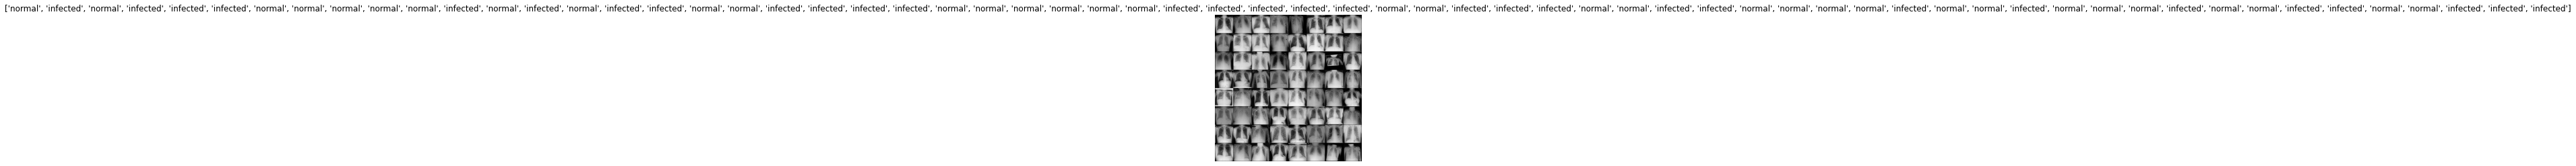

Predicted:  normal normal normal normal normal normal normal normal normal normal normal normal normal normal normal normal normal normal normal normal normal normal normal normal normal normal normal normal normal normal normal normal normal normal normal normal normal normal normal normal normal normal normal normal normal normal normal normal normal normal normal normal normal normal normal normal normal normal normal normal normal normal normal normal
Ground Truth:  normal infected normal infected infected infected normal normal normal normal normal infected normal infected normal infected infected normal normal infected infected infected infected normal normal normal normal normal normal infected infected infected infected infected normal normal infected infected infected normal normal infected infected normal normal normal normal infected normal normal infected normal normal normal infected normal normal infected infected normal normal infected infected infected
Accuracy of the n

In [0]:
  dataiter = iter(testloader)
images, labels = dataiter.next()
show_databatch(images, labels)
images, labels = images.to(device), labels.to(device) #-->convert test image to cuda (if available)
outputs = vgg16(images)                               #--> forward pass
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % class_names[predicted[j]]
                              for j in range(len(images))))
print('Ground Truth: ', ' '.join('%5s' % class_names[labels[j]]
                              for j in range(len(images))))
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = vgg16(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))


# ResNet Task 1

In [43]:
from google.colab import drive
drive.mount('./gdrive')
!unzip "./gdrive/My Drive/Assignment 5 Dataset.zip"
trainPath='/content/Assignment 5 Dataset/train'
validPath='/content/Assignment 5 Dataset/validation'
testPath='/content/Assignment 5 Dataset/test'


Drive already mounted at ./gdrive; to attempt to forcibly remount, call drive.mount("./gdrive", force_remount=True).
Archive:  ./gdrive/My Drive/Assignment 5 Dataset.zip
replace Assignment 5 Dataset/desktop.ini? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [44]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.autograd import Variable
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy
from sklearn.metrics import accuracy_score
#Define transforms for the training data and testing data
train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                       transforms.Resize((224,224)),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor()])

valid_transforms = transforms.Compose([transforms.Resize((224,224)),

                                      transforms.ToTensor()])


test_transforms = transforms.Compose([transforms.Resize((224,224)),

                                      transforms.ToTensor()])
#pass transform here-in
train_data = torchvision.datasets.ImageFolder(trainPath , transform=train_transforms)
valid_data=torchvision.datasets.ImageFolder(validPath , transform=train_transforms)
test_data = datasets.ImageFolder(testPath, transform=test_transforms)

#data loaders
trainloader = torch.utils.data.DataLoader(train_data, batch_size=128, shuffle=True,num_workers=4)
validloader=torch.utils.data.DataLoader(valid_data, batch_size=128, shuffle=True,num_workers=4)
testloader = torch.utils.data.DataLoader(test_data, batch_size=128, shuffle=True,num_workers=4)

print("Classes: ")
class_names = train_data.classes
print(class_names)

Classes: 
['infected', 'normal']


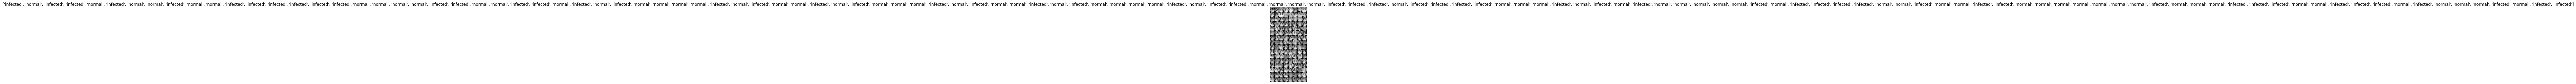

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth



ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
 

In [45]:
def imshow(inp, title=None):
    inp = inp.numpy().transpose((1, 2, 0))
    plt.axis('off')
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)

def show_databatch(inputs, classes):
    out = torchvision.utils.make_grid(inputs)
    imshow(out, title=[class_names[x] for x in classes])

# Get a batch of training data
inputs, classes = next(iter(trainloader))
show_databatch(inputs, classes)# Load the pretrained model from pytorch

vgg16 = models.resnet18(pretrained=True)
ftrs=vgg16.fc.in_features
print(vgg16)
# print('Output Layer of VGG16 : ', vgg16.classifier[6].out_features) # 1000 

# num_features = vgg16.classifier[6].in_features
# features = list(vgg16.classifier.children())[:] 
for param in vgg16.parameters():
    param.requires_grad = False
# vgg16.classifier[6].out_features = 1000
features=([nn.Linear(512,420),nn.ReLU(inplace=True),nn.Dropout(p=0.5,inplace=False),nn.Linear(420, 2)])

vgg16.fc=nn.Sequential(*features)

# print(features)

# Freeze training for all layers


In [46]:
vgg16.classifier = nn.Sequential(*features)
print(vgg16)
Epochs = 10
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(vgg16.parameters(), lr=0.1, momentum=0.6)
def validLos(loader):
   total=0.0
   correct=0.0
   running_loss=0.0   

   pbar = tqdm(enumerate(loader))
   for i, data in pbar:
      # get the inputs
      inputs, labels = data
      inputs, labels = inputs.to(device), labels.to(device)

      # forward + backward + optimize
      outputs = vgg16(inputs)               #----> forward pass
      loss = criterion(outputs, labels)   #----> compute loss

      _,pred=torch.max(outputs.data,dim=1)        
      
      total += labels.size(0)
      correct += (pred == labels).sum().item()
          # print statistics
      accuracy=correct*100/total
      running_loss += loss.item()
      
      pbar.set_description(
          'Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
              epoch, i * len(inputs), len(loader.dataset),
              100. * i / len(loader),
              loss.item()))
   return running_loss,len(data),accuracy

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  




0it [00:00, ?it/s]


Train Epoch: 0 [0/12000 (0%)]	Loss: 0.678604: : 0it [00:05, ?it/s]


Train Epoch: 0 [0/12000 (0%)]	Loss: 0.678604: : 1it [00:05,  5.14s/it]


Train Epoch: 0 [128/12000 (1%)]	Loss: 1.063254: : 1it [00:05,  5.14s/it]


Train Epoch: 0 [128/12000 (1%)]	Loss: 1.063254: : 2it [00:05,  3.68s/it]


Train Epoch: 0 [256/12000 (2%)]	Loss: 1.604676: : 2it [00:05,  3.68s/it]


Train Epoch: 0 [256/12000 (2%)]	Loss: 1.604676: : 3it [00:05,  2.67s/it]


Train Epoch: 0 [384/12000 (3%)]	Loss: 0.598442: : 3it [00:05,  2.67s/it]


Train Epoch: 0 [384/12000 (3%)]	Loss: 0.598442: : 4it [00:05,  1.94s/it]


Train Epoch: 0 [512/12000 (4%)]	Loss: 0.565344: : 4it [00:10,  1.94s/it]


Train Epoch: 0 [512/12000 (4%)]	Loss: 0.565344: : 5it [00:10,  2.60s/it]


Train Epoch: 0 [640/12000 (5%)]	Loss: 0.557930: : 5it [00:10,  2.60s/it]


Train Epoch: 0 [640/12000 (5%)]	Loss: 0.557930: : 6it [00:10,  1.89s/it]


Train Epoch: 0 [768/12000 (6%)]	Loss: 0.538697: : 6it [00:10,  1.89s/it]


Train Epo

81.33333333333333 Mean Validation Accracy
 74.94086323329688 Mean Train Accuracy 2.5494612753391266 Epoch Validation Loss 0.4561063105121572 Epoch train Loss






0it [00:00, ?it/s]


Train Epoch: 1 [0/12000 (0%)]	Loss: 0.294055: : 0it [00:04, ?it/s]


Train Epoch: 1 [0/12000 (0%)]	Loss: 0.294055: : 1it [00:04,  4.86s/it]


Train Epoch: 1 [128/12000 (1%)]	Loss: 0.286566: : 1it [00:05,  4.86s/it]


Train Epoch: 1 [128/12000 (1%)]	Loss: 0.286566: : 2it [00:05,  3.48s/it]


Train Epoch: 1 [256/12000 (2%)]	Loss: 0.498549: : 2it [00:05,  3.48s/it]


Train Epoch: 1 [256/12000 (2%)]	Loss: 0.498549: : 3it [00:05,  2.53s/it]


Train Epoch: 1 [384/12000 (3%)]	Loss: 0.357187: : 3it [00:05,  2.53s/it]


Train Epoch: 1 [384/12000 (3%)]	Loss: 0.357187: : 4it [00:05,  1.84s/it]


Train Epoch: 1 [512/12000 (4%)]	Loss: 0.314253: : 4it [00:09,  1.84s/it]


Train Epoch: 1 [512/12000 (4%)]	Loss: 0.314253: : 5it [00:09,  2.45s/it]


Train Epoch: 1 [640/12000 (5%)]	Loss: 0.373788: : 5it [00:09,  2.45s/it]


Train Epoch: 1 [640/12000 (5%)]	Loss: 0.373788: : 6it [00:09,  1.79s/it]


Train Epoch: 1 [768/12000 (6%)]	Loss: 0.470701: : 6it [00:10,  1.79s/it]


Train Ep

83.6 Mean Validation Accracy
 81.30261968051168 Mean Train Accuracy 2.23030187189579 Epoch Validation Loss 0.40978194059843714 Epoch train Loss






0it [00:00, ?it/s]


Train Epoch: 2 [0/12000 (0%)]	Loss: 0.339676: : 0it [00:04, ?it/s]


Train Epoch: 2 [0/12000 (0%)]	Loss: 0.339676: : 1it [00:04,  4.89s/it]


Train Epoch: 2 [128/12000 (1%)]	Loss: 0.358940: : 1it [00:05,  4.89s/it]


Train Epoch: 2 [128/12000 (1%)]	Loss: 0.358940: : 2it [00:05,  3.50s/it]


Train Epoch: 2 [256/12000 (2%)]	Loss: 0.270982: : 2it [00:05,  3.50s/it]


Train Epoch: 2 [256/12000 (2%)]	Loss: 0.270982: : 3it [00:05,  2.53s/it]


Train Epoch: 2 [384/12000 (3%)]	Loss: 0.257345: : 3it [00:05,  2.53s/it]


Train Epoch: 2 [384/12000 (3%)]	Loss: 0.257345: : 4it [00:05,  1.85s/it]


Train Epoch: 2 [512/12000 (4%)]	Loss: 0.428461: : 4it [00:10,  1.85s/it]


Train Epoch: 2 [512/12000 (4%)]	Loss: 0.428461: : 5it [00:10,  2.79s/it]


Train Epoch: 2 [640/12000 (5%)]	Loss: 0.390653: : 5it [00:10,  2.79s/it]


Train Epoch: 2 [640/12000 (5%)]	Loss: 0.390653: : 6it [00:10,  2.02s/it]


Train Epoch: 2 [768/12000 (6%)]	Loss: 0.314871: : 6it [00:11,  2.02s/it]


Train Ep

84.53333333333333 Mean Validation Accracy
 83.20264344797208 Mean Train Accuracy 2.1288608610630035 Epoch Validation Loss 0.38675788219304796 Epoch train Loss






0it [00:00, ?it/s]


Train Epoch: 3 [0/12000 (0%)]	Loss: 0.316371: : 0it [00:04, ?it/s]


Train Epoch: 3 [0/12000 (0%)]	Loss: 0.316371: : 1it [00:04,  4.79s/it]


Train Epoch: 3 [128/12000 (1%)]	Loss: 0.438443: : 1it [00:05,  4.79s/it]


Train Epoch: 3 [128/12000 (1%)]	Loss: 0.438443: : 2it [00:05,  3.47s/it]


Train Epoch: 3 [256/12000 (2%)]	Loss: 0.344770: : 2it [00:05,  3.47s/it]


Train Epoch: 3 [256/12000 (2%)]	Loss: 0.344770: : 3it [00:05,  2.52s/it]


Train Epoch: 3 [384/12000 (3%)]	Loss: 0.352029: : 3it [00:05,  2.52s/it]


Train Epoch: 3 [384/12000 (3%)]	Loss: 0.352029: : 4it [00:05,  1.84s/it]


Train Epoch: 3 [512/12000 (4%)]	Loss: 0.244961: : 4it [00:09,  1.84s/it]


Train Epoch: 3 [512/12000 (4%)]	Loss: 0.244961: : 5it [00:09,  2.46s/it]


Train Epoch: 3 [640/12000 (5%)]	Loss: 0.366502: : 5it [00:09,  2.46s/it]


Train Epoch: 3 [640/12000 (5%)]	Loss: 0.366502: : 6it [00:09,  1.80s/it]


Train Epoch: 3 [768/12000 (6%)]	Loss: 0.387346: : 6it [00:10,  1.80s/it]


Train Ep

84.53333333333333 Mean Validation Accracy
 84.02693544457664 Mean Train Accuracy 2.118599236011505 Epoch Validation Loss 0.37429682034602824 Epoch train Loss






0it [00:00, ?it/s]


Train Epoch: 4 [0/12000 (0%)]	Loss: 0.329567: : 0it [00:05, ?it/s]


Train Epoch: 4 [0/12000 (0%)]	Loss: 0.329567: : 1it [00:05,  5.29s/it]


Train Epoch: 4 [128/12000 (1%)]	Loss: 0.413984: : 1it [00:05,  5.29s/it]


Train Epoch: 4 [128/12000 (1%)]	Loss: 0.413984: : 2it [00:05,  3.77s/it]


Train Epoch: 4 [256/12000 (2%)]	Loss: 0.345337: : 2it [00:05,  3.77s/it]


Train Epoch: 4 [256/12000 (2%)]	Loss: 0.345337: : 3it [00:05,  2.72s/it]


Train Epoch: 4 [384/12000 (3%)]	Loss: 0.267571: : 3it [00:06,  2.72s/it]


Train Epoch: 4 [384/12000 (3%)]	Loss: 0.267571: : 4it [00:06,  1.98s/it]


Train Epoch: 4 [512/12000 (4%)]	Loss: 0.317227: : 4it [00:09,  1.98s/it]


Train Epoch: 4 [512/12000 (4%)]	Loss: 0.317227: : 5it [00:09,  2.56s/it]


Train Epoch: 4 [640/12000 (5%)]	Loss: 0.329203: : 5it [00:10,  2.56s/it]


Train Epoch: 4 [640/12000 (5%)]	Loss: 0.329203: : 6it [00:10,  1.87s/it]


Train Epoch: 4 [768/12000 (6%)]	Loss: 0.331337: : 6it [00:10,  1.87s/it]


Train Ep

84.46666666666667 Mean Validation Accracy
 84.56447141317848 Mean Train Accuracy 2.4656293243169785 Epoch Validation Loss 0.3645622615484481 Epoch train Loss






0it [00:00, ?it/s]


Train Epoch: 5 [0/12000 (0%)]	Loss: 0.380403: : 0it [00:04, ?it/s]


Train Epoch: 5 [0/12000 (0%)]	Loss: 0.380403: : 1it [00:04,  4.95s/it]


Train Epoch: 5 [128/12000 (1%)]	Loss: 0.258030: : 1it [00:05,  4.95s/it]


Train Epoch: 5 [128/12000 (1%)]	Loss: 0.258030: : 2it [00:05,  3.54s/it]


Train Epoch: 5 [256/12000 (2%)]	Loss: 0.198395: : 2it [00:05,  3.54s/it]


Train Epoch: 5 [256/12000 (2%)]	Loss: 0.198395: : 3it [00:05,  2.57s/it]


Train Epoch: 5 [384/12000 (3%)]	Loss: 0.259325: : 3it [00:05,  2.57s/it]


Train Epoch: 5 [384/12000 (3%)]	Loss: 0.259325: : 4it [00:05,  1.87s/it]


Train Epoch: 5 [512/12000 (4%)]	Loss: 0.346734: : 4it [00:09,  1.87s/it]


Train Epoch: 5 [512/12000 (4%)]	Loss: 0.346734: : 5it [00:09,  2.49s/it]


Train Epoch: 5 [640/12000 (5%)]	Loss: 0.318573: : 5it [00:09,  2.49s/it]


Train Epoch: 5 [640/12000 (5%)]	Loss: 0.318573: : 6it [00:09,  1.81s/it]


Train Epoch: 5 [768/12000 (6%)]	Loss: 0.239368: : 6it [00:10,  1.81s/it]


Train Ep

83.0 Mean Validation Accracy
 84.94184171064951 Mean Train Accuracy 2.493397891521454 Epoch Validation Loss 0.3574747455352587 Epoch train Loss






0it [00:00, ?it/s]


Train Epoch: 6 [0/12000 (0%)]	Loss: 0.390176: : 0it [00:04, ?it/s]


Train Epoch: 6 [0/12000 (0%)]	Loss: 0.390176: : 1it [00:04,  4.73s/it]


Train Epoch: 6 [128/12000 (1%)]	Loss: 0.358883: : 1it [00:04,  4.73s/it]


Train Epoch: 6 [128/12000 (1%)]	Loss: 0.358883: : 2it [00:04,  3.38s/it]


Train Epoch: 6 [256/12000 (2%)]	Loss: 0.367741: : 2it [00:05,  3.38s/it]


Train Epoch: 6 [256/12000 (2%)]	Loss: 0.367741: : 3it [00:05,  2.46s/it]


Train Epoch: 6 [384/12000 (3%)]	Loss: 0.366836: : 3it [00:05,  2.46s/it]


Train Epoch: 6 [384/12000 (3%)]	Loss: 0.366836: : 4it [00:05,  1.79s/it]


Train Epoch: 6 [512/12000 (4%)]	Loss: 0.360888: : 4it [00:09,  1.79s/it]


Train Epoch: 6 [512/12000 (4%)]	Loss: 0.360888: : 5it [00:09,  2.48s/it]


Train Epoch: 6 [640/12000 (5%)]	Loss: 0.372650: : 5it [00:09,  2.48s/it]


Train Epoch: 6 [640/12000 (5%)]	Loss: 0.372650: : 6it [00:09,  1.81s/it]


Train Epoch: 6 [768/12000 (6%)]	Loss: 0.266737: : 6it [00:10,  1.81s/it]


Train Ep

85.53333333333333 Mean Validation Accracy
 85.23823923979205 Mean Train Accuracy 2.0263756588101387 Epoch Validation Loss 0.35250507519328483 Epoch train Loss






0it [00:00, ?it/s]


Train Epoch: 7 [0/12000 (0%)]	Loss: 0.297132: : 0it [00:04, ?it/s]


Train Epoch: 7 [0/12000 (0%)]	Loss: 0.297132: : 1it [00:04,  4.84s/it]


Train Epoch: 7 [128/12000 (1%)]	Loss: 0.272656: : 1it [00:05,  4.84s/it]


Train Epoch: 7 [128/12000 (1%)]	Loss: 0.272656: : 2it [00:05,  3.46s/it]


Train Epoch: 7 [256/12000 (2%)]	Loss: 0.303554: : 2it [00:05,  3.46s/it]


Train Epoch: 7 [256/12000 (2%)]	Loss: 0.303554: : 3it [00:05,  2.50s/it]


Train Epoch: 7 [384/12000 (3%)]	Loss: 0.379508: : 3it [00:05,  2.50s/it]


Train Epoch: 7 [384/12000 (3%)]	Loss: 0.379508: : 4it [00:05,  1.83s/it]


Train Epoch: 7 [512/12000 (4%)]	Loss: 0.428902: : 4it [00:10,  1.83s/it]


Train Epoch: 7 [512/12000 (4%)]	Loss: 0.428902: : 5it [00:10,  2.63s/it]


Train Epoch: 7 [640/12000 (5%)]	Loss: 0.322533: : 5it [00:10,  2.63s/it]


Train Epoch: 7 [640/12000 (5%)]	Loss: 0.322533: : 6it [00:10,  1.92s/it]


Train Epoch: 7 [768/12000 (6%)]	Loss: 0.303804: : 6it [00:10,  1.92s/it]


Train Ep

85.46666666666667 Mean Validation Accracy
 85.47455673110677 Mean Train Accuracy 2.0713552981615067 Epoch Validation Loss 0.34817957087479373 Epoch train Loss






0it [00:00, ?it/s]


Train Epoch: 8 [0/12000 (0%)]	Loss: 0.309981: : 0it [00:04, ?it/s]


Train Epoch: 8 [0/12000 (0%)]	Loss: 0.309981: : 1it [00:04,  4.81s/it]


Train Epoch: 8 [128/12000 (1%)]	Loss: 0.237910: : 1it [00:05,  4.81s/it]


Train Epoch: 8 [128/12000 (1%)]	Loss: 0.237910: : 2it [00:05,  3.53s/it]


Train Epoch: 8 [256/12000 (2%)]	Loss: 0.337986: : 2it [00:05,  3.53s/it]


Train Epoch: 8 [256/12000 (2%)]	Loss: 0.337986: : 3it [00:05,  2.55s/it]


Train Epoch: 8 [384/12000 (3%)]	Loss: 0.265389: : 3it [00:05,  2.55s/it]


Train Epoch: 8 [384/12000 (3%)]	Loss: 0.265389: : 4it [00:05,  1.87s/it]


Train Epoch: 8 [512/12000 (4%)]	Loss: 0.327356: : 4it [00:09,  1.87s/it]


Train Epoch: 8 [512/12000 (4%)]	Loss: 0.327356: : 5it [00:09,  2.37s/it]


Train Epoch: 8 [640/12000 (5%)]	Loss: 0.235807: : 5it [00:10,  2.37s/it]


Train Epoch: 8 [640/12000 (5%)]	Loss: 0.235807: : 6it [00:10,  1.88s/it]


Train Epoch: 8 [768/12000 (6%)]	Loss: 0.293497: : 6it [00:10,  1.88s/it]


Train Ep

85.33333333333333 Mean Validation Accracy
 85.67264093866042 Mean Train Accuracy 2.0884754210710526 Epoch Validation Loss 0.34475400464402306 Epoch train Loss






0it [00:00, ?it/s]


Train Epoch: 9 [0/12000 (0%)]	Loss: 0.346969: : 0it [00:04, ?it/s]


Train Epoch: 9 [0/12000 (0%)]	Loss: 0.346969: : 1it [00:04,  4.78s/it]


Train Epoch: 9 [128/12000 (1%)]	Loss: 0.279094: : 1it [00:05,  4.78s/it]


Train Epoch: 9 [128/12000 (1%)]	Loss: 0.279094: : 2it [00:05,  3.42s/it]


Train Epoch: 9 [256/12000 (2%)]	Loss: 0.294957: : 2it [00:05,  3.42s/it]


Train Epoch: 9 [256/12000 (2%)]	Loss: 0.294957: : 3it [00:05,  2.48s/it]


Train Epoch: 9 [384/12000 (3%)]	Loss: 0.353104: : 3it [00:05,  2.48s/it]


Train Epoch: 9 [384/12000 (3%)]	Loss: 0.353104: : 4it [00:05,  1.81s/it]


Train Epoch: 9 [512/12000 (4%)]	Loss: 0.297480: : 4it [00:09,  1.81s/it]


Train Epoch: 9 [512/12000 (4%)]	Loss: 0.297480: : 5it [00:09,  2.46s/it]


Train Epoch: 9 [640/12000 (5%)]	Loss: 0.258431: : 5it [00:09,  2.46s/it]


Train Epoch: 9 [640/12000 (5%)]	Loss: 0.258431: : 6it [00:09,  1.83s/it]


Train Epoch: 9 [768/12000 (6%)]	Loss: 0.300954: : 6it [00:10,  1.83s/it]


Train Ep

85.8 Mean Validation Accracy
 85.83949333301737 Mean Train Accuracy 2.0262882113456726 Epoch Validation Loss 0.3415848973742191 Epoch train Loss


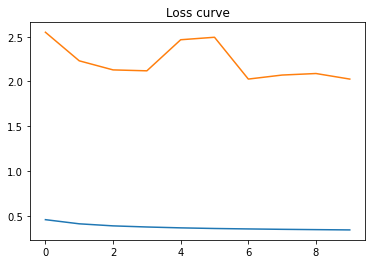

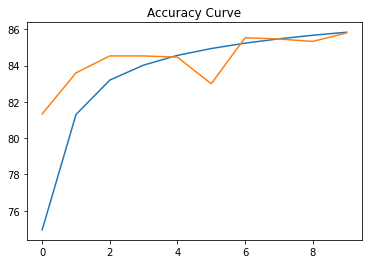

Finished Training


In [47]:
from tqdm import tqdm

#if you have gpu then you need to convert the network and data to cuda
#the easiest way is to first check for device and then convert network and data to device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
vgg16.to(device)
meanTrain=[]
meanValid=[]
meanVerror=[]
meanTerror=[]
losssssList=[]
total=0.0
correct=0.0
for epoch in range(Epochs):  # loop over the dataset multiple times
    vgg16.train()
    acc=[]
    temp=[]
    running_loss = 0.0
    l=0
    pbar = tqdm(enumerate(trainloader))
    for i, data in pbar:
        # get the inputs
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        l=len(data)
        # zero the parameter gradients
        optimizer.zero_grad()
        # In PyTorch, we need to set the gradients to zero before starting to do backpropragation 
        # because PyTorch accumulates the gradients on subsequent backward passes. 
        # This is convenient while training RNNs. 
        # So, the default action is to accumulate the gradients on every loss.backward() call

        # forward + backward + optimize
        outputs = vgg16(inputs)               #----> forward pass
        loss = criterion(outputs, labels)   #----> compute loss
        loss.backward()                     #----> backward pass
        optimizer.step()                    #----> weights update
        
        _,pred=torch.max(outputs.data,dim=1)        
        
        total += labels.size(0)
        correct += (pred == labels).sum().item()
        accuracy=correct*100/total
        temp.append(accuracy)
        losssssList.append(loss.item())
        # running_loss += loss.item()
        # print(running_loss/len(trainloader))
        pbar.set_description(
            'Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, i * len(inputs), len(trainloader.dataset),
                100. * i / len(trainloader),
                loss.item()))
    vgg16.eval()
    
    epoch_loss_train=np.mean(np.asarray(losssssList))#running_loss/len(data)
    meanTerror.append(epoch_loss_train)
    
    tAccu=np.asarray(temp)
    meanTrainAccuracy=np.mean(tAccu)
    meanTrain.append(meanTrainAccuracy)

    los,dataLen,validAccu=validLos(validloader)
    epoch_loss = los/ dataLen
    meanVerror.append(epoch_loss)
    acc.append(validAccu)
    acc=np.asarray(acc)

    meanAccu=np.mean(acc)
    meanValid.append(meanAccu)
    print(meanAccu,"Mean Validation Accracy\n",meanTrainAccuracy,"Mean Train Accuracy",epoch_loss,"Epoch Validation Loss",epoch_loss_train,'Epoch train Loss')
    torch.save(vgg16.state_dict(), 'vgg16_ft.pth')

plt.title("Loss curve")
plt.plot(range(Epochs), meanTerror)
plt.plot(range(Epochs), meanVerror)
plt.show()

plt.title("Accuracy Curve")
plt.plot(range(Epochs), meanTrain)
plt.plot(range(Epochs), meanValid)
plt.show()


print('Finished Training')

In [0]:
  dataiter = iter(testloader)
images, labels = dataiter.next()
show_databatch(images, labels)
images, labels = images.to(device), labels.to(device) #-->convert test image to cuda (if available)
outputs = vgg16(images)                               #--> forward pass
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % class_names[predicted[j]]
                              for j in range(len(images))))
print('Ground Truth: ', ' '.join('%5s' % class_names[labels[j]]
                              for j in range(len(images))))
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = vgg16(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))


# ResNet18 Task 2

In [16]:
vgg16 = models.resnet18(pretrained=True)
ftrs=vgg16.fc.in_features
print(vgg16)

for param in vgg16.parameters():
    param.requires_grad = True

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth



ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
 

In [0]:

# vgg16.classifier[6].out_features = 1000
features=([nn.Linear(512,420),nn.ReLU(inplace=True),nn.Dropout(p=0.5,inplace=False),nn.Linear(420, 2)])

vgg16.fc=nn.Sequential(*features)

In [22]:
vgg16.classifier = nn.Sequential(*features)
print(vgg16)
Epochs = 10
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(vgg16.parameters(), lr=0.1, momentum=0.6)
def validLos(loader):
   total=0.0
   correct=0.0
   running_loss=0.0   

   pbar = tqdm(enumerate(loader))
   for i, data in pbar:
      # get the inputs
      inputs, labels = data
      inputs, labels = inputs.to(device), labels.to(device)

      # forward + backward + optimize
      outputs = vgg16(inputs)               #----> forward pass
      loss = criterion(outputs, labels)   #----> compute loss

      _,pred=torch.max(outputs.data,dim=1)        
      
      total += labels.size(0)
      correct += (pred == labels).sum().item()
          # print statistics
      accuracy=correct*100/total
      running_loss += loss.item()
      
      pbar.set_description(
          'Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
              epoch, i * len(inputs), len(loader.dataset),
              100. * i / len(loader),
              loss.item()))
   return running_loss,len(data),accuracy

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  


0it [00:00, ?it/s]
Train Epoch: 0 [0/12000 (0%)]	Loss: 0.726790: : 0it [00:05, ?it/s]
Train Epoch: 0 [0/12000 (0%)]	Loss: 0.726790: : 1it [00:05,  5.38s/it]
Train Epoch: 0 [128/12000 (1%)]	Loss: 1.082390: : 1it [00:05,  5.38s/it]
Train Epoch: 0 [128/12000 (1%)]	Loss: 1.082390: : 2it [00:05,  3.84s/it]
Train Epoch: 0 [256/12000 (2%)]	Loss: 1.990714: : 2it [00:05,  3.84s/it]
Train Epoch: 0 [256/12000 (2%)]	Loss: 1.990714: : 3it [00:05,  2.76s/it]
Train Epoch: 0 [384/12000 (3%)]	Loss: 0.576607: : 3it [00:06,  2.76s/it]
Train Epoch: 0 [384/12000 (3%)]	Loss: 0.576607: : 4it [00:06,  2.00s/it]
Train Epoch: 0 [512/12000 (4%)]	Loss: 0.664375: : 4it [00:10,  2.00s/it]
Train Epoch: 0 [512/12000 (4%)]	Loss: 0.664375: : 5it [00:10,  2.66s/it]
Train Epoch: 0 [640/12000 (5%)]	Loss: 0.521363: : 5it [00:10,  2.66s/it]
Train Epoch: 0 [640/12000 (5%)]	Loss: 0.521363: : 6it [00:10,  1.94s/it]
Train Epoch: 0 [768/12000 (6%)]	Loss: 0.511545: : 6it [00:10,  1.94s/it]
Train Epoch: 0 [768/12000 (6%)]	Loss: 0

88.4 Mean Validation Accracy
 80.32643167278935 Mean Train Accuracy 1.6827613189816475 Epoch Validation Loss 0.30252766054361424 Epoch train Loss



0it [00:00, ?it/s]
Train Epoch: 1 [0/12000 (0%)]	Loss: 0.167926: : 0it [00:04, ?it/s]
Train Epoch: 1 [0/12000 (0%)]	Loss: 0.167926: : 1it [00:04,  4.99s/it]
Train Epoch: 1 [128/12000 (1%)]	Loss: 0.159804: : 1it [00:05,  4.99s/it]
Train Epoch: 1 [128/12000 (1%)]	Loss: 0.159804: : 2it [00:05,  3.57s/it]
Train Epoch: 1 [256/12000 (2%)]	Loss: 0.125451: : 2it [00:05,  3.57s/it]
Train Epoch: 1 [256/12000 (2%)]	Loss: 0.125451: : 3it [00:05,  2.57s/it]
Train Epoch: 1 [384/12000 (3%)]	Loss: 0.159987: : 3it [00:05,  2.57s/it]
Train Epoch: 1 [384/12000 (3%)]	Loss: 0.159987: : 4it [00:05,  1.87s/it]
Train Epoch: 1 [512/12000 (4%)]	Loss: 0.145735: : 4it [00:09,  1.87s/it]
Train Epoch: 1 [512/12000 (4%)]	Loss: 0.145735: : 5it [00:09,  2.57s/it]
Train Epoch: 1 [640/12000 (5%)]	Loss: 0.131725: : 5it [00:10,  2.57s/it]
Train Epoch: 1 [640/12000 (5%)]	Loss: 0.131725: : 6it [00:10,  1.87s/it]
Train Epoch: 1 [768/12000 (6%)]	Loss: 0.138815: : 6it [00:10,  1.87s/it]
Train Epoch: 1 [768/12000 (6%)]	Loss: 0

80.6 Mean Validation Accracy
 89.38733339224696 Mean Train Accuracy 2.3022530525922775 Epoch Validation Loss 0.25210841368646064 Epoch train Loss




0it [00:00, ?it/s]
Train Epoch: 2 [0/12000 (0%)]	Loss: 0.148566: : 0it [00:05, ?it/s]
Train Epoch: 2 [0/12000 (0%)]	Loss: 0.148566: : 1it [00:05,  5.02s/it]
Train Epoch: 2 [128/12000 (1%)]	Loss: 0.141085: : 1it [00:05,  5.02s/it]
Train Epoch: 2 [128/12000 (1%)]	Loss: 0.141085: : 2it [00:05,  3.59s/it]
Train Epoch: 2 [256/12000 (2%)]	Loss: 0.147528: : 2it [00:05,  3.59s/it]
Train Epoch: 2 [256/12000 (2%)]	Loss: 0.147528: : 3it [00:05,  2.59s/it]
Train Epoch: 2 [384/12000 (3%)]	Loss: 0.204553: : 3it [00:05,  2.59s/it]
Train Epoch: 2 [384/12000 (3%)]	Loss: 0.204553: : 4it [00:05,  1.88s/it]
Train Epoch: 2 [512/12000 (4%)]	Loss: 0.153552: : 4it [00:09,  1.88s/it]
Train Epoch: 2 [512/12000 (4%)]	Loss: 0.153552: : 5it [00:09,  2.57s/it]
Train Epoch: 2 [640/12000 (5%)]	Loss: 0.151833: : 5it [00:10,  2.57s/it]
Train Epoch: 2 [640/12000 (5%)]	Loss: 0.151833: : 6it [00:10,  1.87s/it]
Train Epoch: 2 [768/12000 (6%)]	Loss: 0.264787: : 6it [00:10,  1.87s/it]
Train Epoch: 2 [768/12000 (6%)]	Loss: 

91.26666666666667 Mean Validation Accracy
 90.88582351854247 Mean Train Accuracy 1.452300138771534 Epoch Validation Loss 0.22759921077295397 Epoch train Loss




0it [00:00, ?it/s]
Train Epoch: 3 [0/12000 (0%)]	Loss: 0.150858: : 0it [00:04, ?it/s]
Train Epoch: 3 [0/12000 (0%)]	Loss: 0.150858: : 1it [00:04,  4.85s/it]
Train Epoch: 3 [128/12000 (1%)]	Loss: 0.189408: : 1it [00:05,  4.85s/it]
Train Epoch: 3 [128/12000 (1%)]	Loss: 0.189408: : 2it [00:05,  3.47s/it]
Train Epoch: 3 [256/12000 (2%)]	Loss: 0.118634: : 2it [00:05,  3.47s/it]
Train Epoch: 3 [256/12000 (2%)]	Loss: 0.118634: : 3it [00:05,  2.50s/it]
Train Epoch: 3 [384/12000 (3%)]	Loss: 0.168101: : 3it [00:05,  2.50s/it]
Train Epoch: 3 [384/12000 (3%)]	Loss: 0.168101: : 4it [00:05,  1.82s/it]
Train Epoch: 3 [512/12000 (4%)]	Loss: 0.201750: : 4it [00:09,  1.82s/it]
Train Epoch: 3 [512/12000 (4%)]	Loss: 0.201750: : 5it [00:09,  2.50s/it]
Train Epoch: 3 [640/12000 (5%)]	Loss: 0.152096: : 5it [00:09,  2.50s/it]
Train Epoch: 3 [640/12000 (5%)]	Loss: 0.152096: : 6it [00:09,  1.82s/it]
Train Epoch: 3 [768/12000 (6%)]	Loss: 0.157860: : 6it [00:10,  1.82s/it]
Train Epoch: 3 [768/12000 (6%)]	Loss: 

88.33333333333333 Mean Validation Accracy
 91.72928339872392 Mean Train Accuracy 1.6575336307287216 Epoch Validation Loss 0.21150487245238841 Epoch train Loss




0it [00:00, ?it/s]
Train Epoch: 4 [0/12000 (0%)]	Loss: 0.108330: : 0it [00:05, ?it/s]
Train Epoch: 4 [0/12000 (0%)]	Loss: 0.108330: : 1it [00:05,  5.03s/it]
Train Epoch: 4 [128/12000 (1%)]	Loss: 0.149173: : 1it [00:05,  5.03s/it]
Train Epoch: 4 [128/12000 (1%)]	Loss: 0.149173: : 2it [00:05,  3.59s/it]
Train Epoch: 4 [256/12000 (2%)]	Loss: 0.236184: : 2it [00:05,  3.59s/it]
Train Epoch: 4 [256/12000 (2%)]	Loss: 0.236184: : 3it [00:05,  2.59s/it]
Train Epoch: 4 [384/12000 (3%)]	Loss: 0.112050: : 3it [00:05,  2.59s/it]
Train Epoch: 4 [384/12000 (3%)]	Loss: 0.112050: : 4it [00:05,  1.88s/it]
Train Epoch: 4 [512/12000 (4%)]	Loss: 0.175628: : 4it [00:09,  1.88s/it]
Train Epoch: 4 [512/12000 (4%)]	Loss: 0.175628: : 5it [00:09,  2.58s/it]
Train Epoch: 4 [640/12000 (5%)]	Loss: 0.111132: : 5it [00:10,  2.58s/it]
Train Epoch: 4 [640/12000 (5%)]	Loss: 0.111132: : 6it [00:10,  1.87s/it]
Train Epoch: 4 [768/12000 (6%)]	Loss: 0.087380: : 6it [00:10,  1.87s/it]
Train Epoch: 4 [768/12000 (6%)]	Loss: 

89.46666666666667 Mean Validation Accracy
 92.28674339992155 Mean Train Accuracy 1.6267255544662476 Epoch Validation Loss 0.1994983998622666 Epoch train Loss




0it [00:00, ?it/s]
Train Epoch: 5 [0/12000 (0%)]	Loss: 0.138234: : 0it [00:05, ?it/s]
Train Epoch: 5 [0/12000 (0%)]	Loss: 0.138234: : 1it [00:05,  5.35s/it]
Train Epoch: 5 [128/12000 (1%)]	Loss: 0.133782: : 1it [00:05,  5.35s/it]
Train Epoch: 5 [128/12000 (1%)]	Loss: 0.133782: : 2it [00:05,  3.82s/it]
Train Epoch: 5 [256/12000 (2%)]	Loss: 0.167947: : 2it [00:05,  3.82s/it]
Train Epoch: 5 [256/12000 (2%)]	Loss: 0.167947: : 3it [00:05,  2.76s/it]
Train Epoch: 5 [384/12000 (3%)]	Loss: 0.112022: : 3it [00:06,  2.76s/it]
Train Epoch: 5 [384/12000 (3%)]	Loss: 0.112022: : 4it [00:06,  2.00s/it]
Train Epoch: 5 [512/12000 (4%)]	Loss: 0.170499: : 4it [00:10,  2.00s/it]
Train Epoch: 5 [512/12000 (4%)]	Loss: 0.170499: : 5it [00:10,  2.61s/it]
Train Epoch: 5 [640/12000 (5%)]	Loss: 0.101791: : 5it [00:10,  2.61s/it]
Train Epoch: 5 [640/12000 (5%)]	Loss: 0.101791: : 6it [00:10,  1.90s/it]
Train Epoch: 5 [768/12000 (6%)]	Loss: 0.162977: : 6it [00:10,  1.90s/it]
Train Epoch: 5 [768/12000 (6%)]	Loss: 

90.93333333333334 Mean Validation Accracy
 92.68891156321044 Mean Train Accuracy 1.393189787864685 Epoch Validation Loss 0.1908497836454012 Epoch train Loss




0it [00:00, ?it/s]
Train Epoch: 6 [0/12000 (0%)]	Loss: 0.118952: : 0it [00:04, ?it/s]
Train Epoch: 6 [0/12000 (0%)]	Loss: 0.118952: : 1it [00:04,  4.98s/it]
Train Epoch: 6 [128/12000 (1%)]	Loss: 0.108276: : 1it [00:05,  4.98s/it]
Train Epoch: 6 [128/12000 (1%)]	Loss: 0.108276: : 2it [00:05,  3.55s/it]
Train Epoch: 6 [256/12000 (2%)]	Loss: 0.165383: : 2it [00:05,  3.55s/it]
Train Epoch: 6 [256/12000 (2%)]	Loss: 0.165383: : 3it [00:05,  2.56s/it]
Train Epoch: 6 [384/12000 (3%)]	Loss: 0.146459: : 3it [00:05,  2.56s/it]
Train Epoch: 6 [384/12000 (3%)]	Loss: 0.146459: : 4it [00:05,  1.86s/it]
Train Epoch: 6 [512/12000 (4%)]	Loss: 0.113865: : 4it [00:09,  1.86s/it]
Train Epoch: 6 [512/12000 (4%)]	Loss: 0.113865: : 5it [00:09,  2.54s/it]
Train Epoch: 6 [640/12000 (5%)]	Loss: 0.158464: : 5it [00:10,  2.54s/it]
Train Epoch: 6 [640/12000 (5%)]	Loss: 0.158464: : 6it [00:10,  1.88s/it]
Train Epoch: 6 [768/12000 (6%)]	Loss: 0.125625: : 6it [00:10,  1.88s/it]
Train Epoch: 6 [768/12000 (6%)]	Loss: 

91.33333333333333 Mean Validation Accracy
 93.0103118017733 Mean Train Accuracy 1.5715673342347145 Epoch Validation Loss 0.18303664920902543 Epoch train Loss




0it [00:00, ?it/s]
Train Epoch: 7 [0/12000 (0%)]	Loss: 0.101992: : 0it [00:04, ?it/s]
Train Epoch: 7 [0/12000 (0%)]	Loss: 0.101992: : 1it [00:04,  4.99s/it]
Train Epoch: 7 [128/12000 (1%)]	Loss: 0.077457: : 1it [00:05,  4.99s/it]
Train Epoch: 7 [128/12000 (1%)]	Loss: 0.077457: : 2it [00:05,  3.56s/it]
Train Epoch: 7 [256/12000 (2%)]	Loss: 0.069071: : 2it [00:05,  3.56s/it]
Train Epoch: 7 [256/12000 (2%)]	Loss: 0.069071: : 3it [00:05,  2.60s/it]
Train Epoch: 7 [384/12000 (3%)]	Loss: 0.082612: : 3it [00:05,  2.60s/it]
Train Epoch: 7 [384/12000 (3%)]	Loss: 0.082612: : 4it [00:05,  1.89s/it]
Train Epoch: 7 [512/12000 (4%)]	Loss: 0.087585: : 4it [00:09,  1.89s/it]
Train Epoch: 7 [512/12000 (4%)]	Loss: 0.087585: : 5it [00:09,  2.54s/it]
Train Epoch: 7 [640/12000 (5%)]	Loss: 0.165381: : 5it [00:10,  2.54s/it]
Train Epoch: 7 [640/12000 (5%)]	Loss: 0.165381: : 6it [00:10,  1.88s/it]
Train Epoch: 7 [768/12000 (6%)]	Loss: 0.225498: : 6it [00:10,  1.88s/it]
Train Epoch: 7 [768/12000 (6%)]	Loss: 

88.73333333333333 Mean Validation Accracy
 93.28791485045548 Mean Train Accuracy 1.6577982902526855 Epoch Validation Loss 0.1769684168728108 Epoch train Loss




0it [00:00, ?it/s]
Train Epoch: 8 [0/12000 (0%)]	Loss: 0.136590: : 0it [00:04, ?it/s]
Train Epoch: 8 [0/12000 (0%)]	Loss: 0.136590: : 1it [00:04,  4.89s/it]
Train Epoch: 8 [128/12000 (1%)]	Loss: 0.117428: : 1it [00:05,  4.89s/it]
Train Epoch: 8 [128/12000 (1%)]	Loss: 0.117428: : 2it [00:05,  3.49s/it]
Train Epoch: 8 [256/12000 (2%)]	Loss: 0.166303: : 2it [00:05,  3.49s/it]
Train Epoch: 8 [256/12000 (2%)]	Loss: 0.166303: : 3it [00:05,  2.52s/it]
Train Epoch: 8 [384/12000 (3%)]	Loss: 0.150426: : 3it [00:05,  2.52s/it]
Train Epoch: 8 [384/12000 (3%)]	Loss: 0.150426: : 4it [00:05,  1.83s/it]
Train Epoch: 8 [512/12000 (4%)]	Loss: 0.090804: : 4it [00:09,  1.83s/it]
Train Epoch: 8 [512/12000 (4%)]	Loss: 0.090804: : 5it [00:09,  2.50s/it]
Train Epoch: 8 [640/12000 (5%)]	Loss: 0.049245: : 5it [00:09,  2.50s/it]
Train Epoch: 8 [640/12000 (5%)]	Loss: 0.049245: : 6it [00:09,  1.81s/it]
Train Epoch: 8 [768/12000 (6%)]	Loss: 0.174833: : 6it [00:10,  1.81s/it]
Train Epoch: 8 [768/12000 (6%)]	Loss: 

90.86666666666666 Mean Validation Accracy
 93.52594782516763 Mean Train Accuracy 1.331135980784893 Epoch Validation Loss 0.17169159860845576 Epoch train Loss



0it [00:00, ?it/s]
Train Epoch: 9 [0/12000 (0%)]	Loss: 0.138510: : 0it [00:04, ?it/s]
Train Epoch: 9 [0/12000 (0%)]	Loss: 0.138510: : 1it [00:04,  4.98s/it]
Train Epoch: 9 [128/12000 (1%)]	Loss: 0.094192: : 1it [00:05,  4.98s/it]
Train Epoch: 9 [128/12000 (1%)]	Loss: 0.094192: : 2it [00:05,  3.56s/it]
Train Epoch: 9 [256/12000 (2%)]	Loss: 0.171657: : 2it [00:05,  3.56s/it]
Train Epoch: 9 [256/12000 (2%)]	Loss: 0.171657: : 3it [00:05,  2.57s/it]
Train Epoch: 9 [384/12000 (3%)]	Loss: 0.165846: : 3it [00:05,  2.57s/it]
Train Epoch: 9 [384/12000 (3%)]	Loss: 0.165846: : 4it [00:05,  1.87s/it]
Train Epoch: 9 [512/12000 (4%)]	Loss: 0.109621: : 4it [00:09,  1.87s/it]
Train Epoch: 9 [512/12000 (4%)]	Loss: 0.109621: : 5it [00:09,  2.53s/it]
Train Epoch: 9 [640/12000 (5%)]	Loss: 0.096792: : 5it [00:10,  2.53s/it]
Train Epoch: 9 [640/12000 (5%)]	Loss: 0.096792: : 6it [00:10,  1.86s/it]
Train Epoch: 9 [768/12000 (6%)]	Loss: 0.082868: : 6it [00:10,  1.86s/it]
Train Epoch: 9 [768/12000 (6%)]	Loss: 0

85.8 Mean Validation Accracy
 93.70528069638036 Mean Train Accuracy 2.425732985138893 Epoch Validation Loss 0.1672704585570287 Epoch train Loss


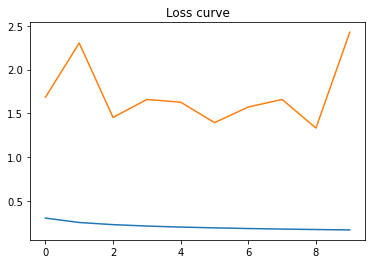

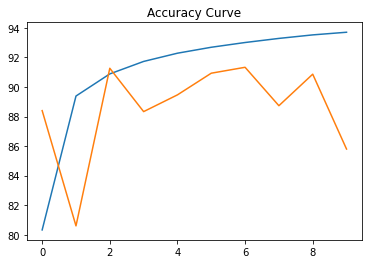

Finished Training


In [23]:
from tqdm import tqdm

#if you have gpu then you need to convert the network and data to cuda
#the easiest way is to first check for device and then convert network and data to device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
vgg16.to(device)
meanTrain=[]
meanValid=[]
meanVerror=[]
meanTerror=[]
losssssList=[]
total=0.0
correct=0.0
all_pred=[]
targetd=[]
for epoch in range(Epochs):  # loop over the dataset multiple times
    vgg16.train()
    acc=[]
    temp=[]
    running_loss = 0.0
    l=0
    pbar = tqdm(enumerate(trainloader))
    for i, data in pbar:
        # get the inputs
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        l=len(data)
        # zero the parameter gradients
        optimizer.zero_grad()
        # In PyTorch, we need to set the gradients to zero before starting to do backpropragation 
        # because PyTorch accumulates the gradients on subsequent backward passes. 
        # This is convenient while training RNNs. 
        # So, the default action is to accumulate the gradients on every loss.backward() call

        # forward + backward + optimize
        outputs = vgg16(inputs)               #----> forward pass
        loss = criterion(outputs, labels)   #----> compute loss
        loss.backward()                     #----> backward pass
        optimizer.step()                    #----> weights update
        
        _,pred=torch.max(outputs.data,dim=1)        
        
        total += labels.size(0)
        correct += (pred == labels).sum().item()
        accuracy=correct*100/total
        temp.append(accuracy)
        losssssList.append(loss.item())
        # running_loss += loss.item()
        # print(running_loss/len(trainloader))
        pbar.set_description(
            'Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, i * len(inputs), len(trainloader.dataset),
                100. * i / len(trainloader),
                loss.item()))
    vgg16.eval()
    targets+=list(labels.view(-1).cpu().numpy())
    all_pred+=(list(pred.view(-1).cpu().numpy()))
    epoch_loss_train=np.mean(np.asarray(losssssList))#running_loss/len(data)
    meanTerror.append(epoch_loss_train)
    
    tAccu=np.asarray(temp)
    meanTrainAccuracy=np.mean(tAccu)
    meanTrain.append(meanTrainAccuracy)

    los,dataLen,validAccu=validLos(validloader)
    epoch_loss = los/ dataLen
    meanVerror.append(epoch_loss)
    acc.append(validAccu)
    acc=np.asarray(acc)

    meanAccu=np.mean(acc)
    meanValid.append(meanAccu)
    print(meanAccu,"Mean Validation Accracy\n",meanTrainAccuracy,"Mean Train Accuracy",epoch_loss,"Epoch Validation Loss",epoch_loss_train,'Epoch train Loss')
    torch.save(vgg16.state_dict(), 'vgg16_ft.pth')

plt.title("Loss curve")
plt.plot(range(Epochs), meanTerror)
plt.plot(range(Epochs), meanVerror)
plt.show()

plt.title("Accuracy Curve")
plt.plot(range(Epochs), meanTrain)
plt.plot(range(Epochs), meanValid)
plt.show()


print('Finished Training')

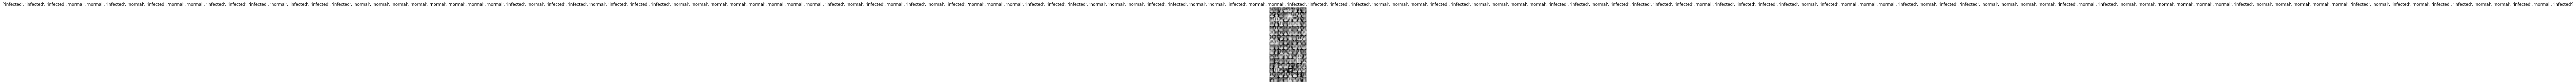

Predicted:  infected infected infected normal normal infected normal infected normal normal infected infected infected normal infected infected infected infected normal normal normal normal normal normal normal infected normal infected infected normal infected infected infected normal normal normal normal normal normal normal normal infected normal infected infected infected infected infected infected normal normal infected infected infected infected normal normal infected infected normal normal infected normal normal infected infected infected infected normal infected normal infected infected infected normal normal normal infected normal normal infected infected infected infected normal infected infected infected infected normal infected normal infected normal infected normal infected infected normal normal normal normal infected normal infected normal normal normal normal normal normal infected normal normal normal normal normal infected normal infected normal infected infected norma

In [24]:
  dataiter = iter(testloader)
images, labels = dataiter.next()
show_databatch(images, labels)
images, labels = images.to(device), labels.to(device) #-->convert test image to cuda (if available)
outputs = vgg16(images)                               #--> forward pass
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % class_names[predicted[j]]
                              for j in range(len(images))))
print('Ground Truth: ', ' '.join('%5s' % class_names[labels[j]]
                              for j in range(len(images))))
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = vgg16(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on test images: %d %%' % (
    100 * correct / total))


# TO get Best and Worst classified Images

In [0]:
#An loop on numbers of images/batches for below code
#Due to mismanagement of time, i could not run this proper, but i am sure that the below algorithm
# is ok to get best and worst classified images
if lable==1 and predicted==1:
  imgshow()
elif lable==1 and predicted==0:
  imgshow()
elif lable=0 and predicted==1:
  imgshow()